<a href="https://colab.research.google.com/github/hessaalshehhi/Testproj/blob/main/project_updated2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



In [2]:
data = pd.read_csv('file.csv')
data

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [3]:
# Get the dataset description
print('The number of rows:', data.shape[0])# Prints how many rows are in the dataset
print('The number of columns:', data.shape[1]) #Prints how many columns the dataset has
print('The column names are:', list(data.columns)) # Shows the names of all columns in the dataset



The number of rows: 52955
The number of columns: 21
The column names are: ['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct']


In [4]:
# Clean the dataset
data.dropna(how='all', inplace=True)           # Drop completely empty rows
data.dropna(axis=1, how='all', inplace=True)   # Drop columns that are entirely empty
data.fillna(0, inplace=True)                   # Replace remaining NaNs with 0
data

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,52950,0.0,0,0,0.0,0.0,0,0,0,Gift Cards,...,0.00,0.0,0,0.0,0,0.0,0.0,11,GC20,20.0
52951,52951,0.0,0,0,0.0,0.0,0,0,0,Notebooks & Journals,...,0.00,0.0,0,0.0,0,0.0,0.0,11,NJ20,20.0
52952,52952,0.0,0,0,0.0,0.0,0,0,0,Android,...,0.00,0.0,0,0.0,0,0.0,0.0,10,AND10,10.0
52953,52953,0.0,0,0,0.0,0.0,0,0,0,Android,...,0.00,0.0,0,0.0,0,0.0,0.0,11,AND20,20.0


In [5]:
#q6
data[["Quantity", "Avg_Price", "Delivery_Charges", "Offline_Spend", "Online_Spend", "Discount_pct"]].describe()

,Quantity,Avg_Price,Delivery_Charges,Offline_Spend,Online_Spend,Discount_pct
count,52955.000000,52955.000000,52955.000000,52955.000000,52955.000000,52955.000000
mean,4.495005,52.207066,10.511473,2829.256916,1892.000888,19.802663
std,20.099120,64.000618,19.471574,938.381867,808.076293,8.278627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.700000,6.000000,2500.000000,1252.630000,10.000000
50%,1.000000,16.990000,6.000000,3000.000000,1837.870000,20.000000
75%,2.000000,102.130000,6.500000,3500.000000,2425.350000,30.000000
max,900.000000,355.740000,521.360000,5000.000000,4556.930000,30.000000


In [6]:
# q7 Step 1: Take a random sample of size 150
sample = data.sample(n=150, random_state=42)  # Random state for consistent results

# Step 2: Calculate measures of frequency
num_observations = sample['Online_Spend'].count()
spend_above_1000 = sample[sample['Online_Spend'] > 1000]  # Example threshold

# Step 3: Calculate measures of central tendency
mean_spend = sample['Online_Spend'].mean()
median_spend = sample['Online_Spend'].median()
mode_spend = sample['Online_Spend'].mode()[0]

# Step 4: Calculate measures of dispersion
range_spend = sample['Online_Spend'].max() - sample['Online_Spend'].min()
variance_spend = sample['Online_Spend'].var()
std_dev_spend = sample['Online_Spend'].std()
iqr_spend = sample['Online_Spend'].quantile(0.75) - sample['Online_Spend'].quantile(0.25)

# Step 5: Detect outliers using IQR method
q1 = sample['Online_Spend'].quantile(0.25)
q3 = sample['Online_Spend'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


# Step 6: Print the results
print(f"Number of Observations in Sample: {num_observations}")
print(f"Observations with Online_Spend > 1000:\n{spend_above_1000}")
print(f"Mean Online_Spend: {mean_spend:.2f}")
print(f"Median Online_Spend: {median_spend}")
print(f"Mode Online_Spend: {mode_spend}")
print(f"Range Online_Spend: {range_spend}")
print(f"Variance Online_Spend: {variance_spend:.2f}")
print(f"Standard Deviation Online_Spend: {std_dev_spend:.2f}")
print(f"IQR Online_Spend: {iqr_spend:.2f}")



Number of Observations in Sample: 150
Observations with Online_Spend > 1000:
       Unnamed: 0  CustomerID Gender       Location  Tenure_Months  \
37636       37636     16520.0      F  Washington DC           37.0   
22292       22292     14560.0      M        Chicago           40.0   
45744       45744     16241.0      M       New York           34.0   
8452         8452     13309.0      M        Chicago           14.0   
780           780     12838.0      F     California           31.0   
...           ...         ...    ...            ...            ...   
20364       20364     17230.0      M     California           29.0   
12005       12005     15601.0      F        Chicago           46.0   
22756       22756     12841.0      F     California           19.0   
21779       21779     18077.0      M        Chicago           34.0   
49386       49386     13113.0      M     New Jersey           44.0   

       Transaction_ID Transaction_Date     Product_SKU  \
37636         25637.0   

In [7]:
# q8 Obtain sample by selecting every 5th row
sample = data.iloc[::5]
# the sample for Online_Spend > 200
sample_spending = sample[sample['Online_Spend'] > 200]
# Sort the condition sample in descending order based on 'Online_Spend'
sample_sorted = sample_spending.sort_values(by='Online_Spend', ascending=False)
# Descriptive statistics for Online_Spend
mean_spend = sample_sorted['Online_Spend'].mean()
median_spend = sample_sorted['Online_Spend'].median()
mode_spend = sample_sorted['Online_Spend'].mode()[0]
range_spend = sample_sorted['Online_Spend'].max() - sample_sorted['Online_Spend'].min()
variance_spend = sample_sorted['Online_Spend'].var()
std_dev_spend = sample_sorted['Online_Spend'].std()
iqr_spend = sample_sorted['Online_Spend'].quantile(0.75) - sample_sorted['Online_Spend'].quantile(0.25)
# Detect outliers using IQR
q1 = sample_sorted['Online_Spend'].quantile(0.25)
q3 = sample_sorted['Online_Spend'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
# Print results
print(f"Mean: {mean_spend:.2f}")
print(f"Median: {median_spend}")
print(f"Mode: {mode_spend}")
print(f"Range: {range_spend}")
print(f"Variance: {variance_spend:.2f}")
print(f"Standard Deviation: {std_dev_spend:.2f}")
print(f"IQR: {iqr_spend:.2f}")

Mean: 1891.38
Median: 1827.02
Mode: 2819.58
Range: 4236.68
Variance: 650129.93
Standard Deviation: 806.31
IQR: 1172.34


In [8]:
#q9 Descriptive Statistics Report


# 1. Mean of all numeric columns
print("Mean of all numeric columns:")
print(data.mean(numeric_only=True))

# 2. Mean of Online_Spend (dependent variable)
print("\nMean of Online Spend:")
print(data['Online_Spend'].mean())

# 3. Row-wise mean: Average spend per transaction (Offline and Online)
print("\nRow-wise Average Spend (Offline + Online):")
print(data[['Offline_Spend', 'Online_Spend']].mean(axis=1).head())

# 4. Median of all numeric columns
print("\nMedian of all numeric columns:")
print(data.median(numeric_only=True))

# 5. Median of Online Spend
print("\nMedian of Online Spend:")
print(data['Online_Spend'].median())

# 6. Most common Coupon_Code used (categorical example similar to 'Division')
print("\nMost frequently used Coupon Code:")
print(data['Coupon_Code'].mode()[0])

# 7. Minimum Online Spend
print("\nMinimum Online Spend:")
print(data['Online_Spend'].min())

# 8. Maximum Online Spend
print("\nMaximum Online Spend:")
print(data['Online_Spend'].max())

# 9. Range of Online Spend
online_range = data['Online_Spend'].max() - data['Online_Spend'].min()
print("\nRange of Online Spend:")
print(online_range)

# 10. Standard Deviation of Online Spend
print("\nStandard Deviation of Online Spend:")
print(data['Online_Spend'].std())

# 11. Variance of Online Spend
print("\nVariance of Online Spend:")
print(data['Online_Spend'].var())


Mean of all numeric columns:
Unnamed: 0          26477.000000
CustomerID          15337.725805
Tenure_Months          26.112699
Transaction_ID      32390.852875
Quantity                4.495005
Avg_Price              52.207066
Delivery_Charges       10.511473
GST                     0.137381
Offline_Spend        2829.256916
Online_Spend         1892.000888
Month                   6.652800
Discount_pct           19.802663
dtype: float64

Mean of Online Spend:
1892.0008879237087

Row-wise Average Spend (Offline + Online):
0    3462.25
1    3462.25
2    3462.25
3    3462.25
4    3462.25
dtype: float64

Median of all numeric columns:
Unnamed: 0          26477.00
CustomerID          15311.00
Tenure_Months          27.00
Transaction_ID      32614.00
Quantity                1.00
Avg_Price              16.99
Delivery_Charges        6.00
GST                     0.18
Offline_Spend        3000.00
Online_Spend         1837.87
Month                   7.00
Discount_pct           20.00
dtype: float64

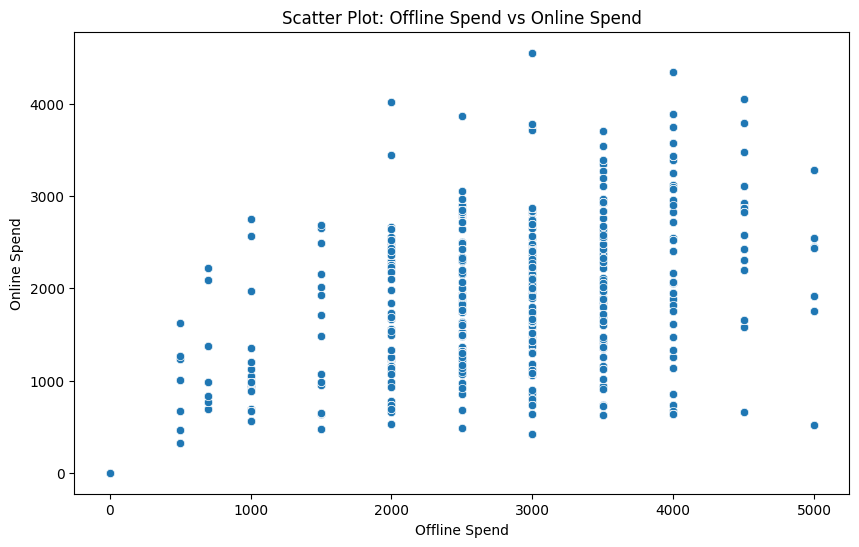

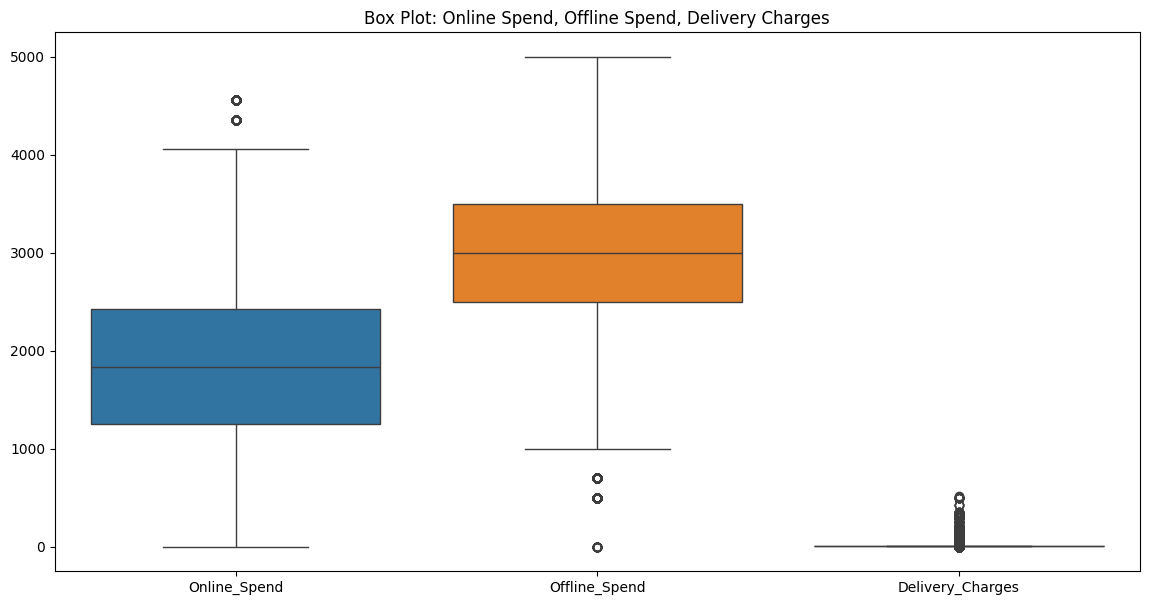

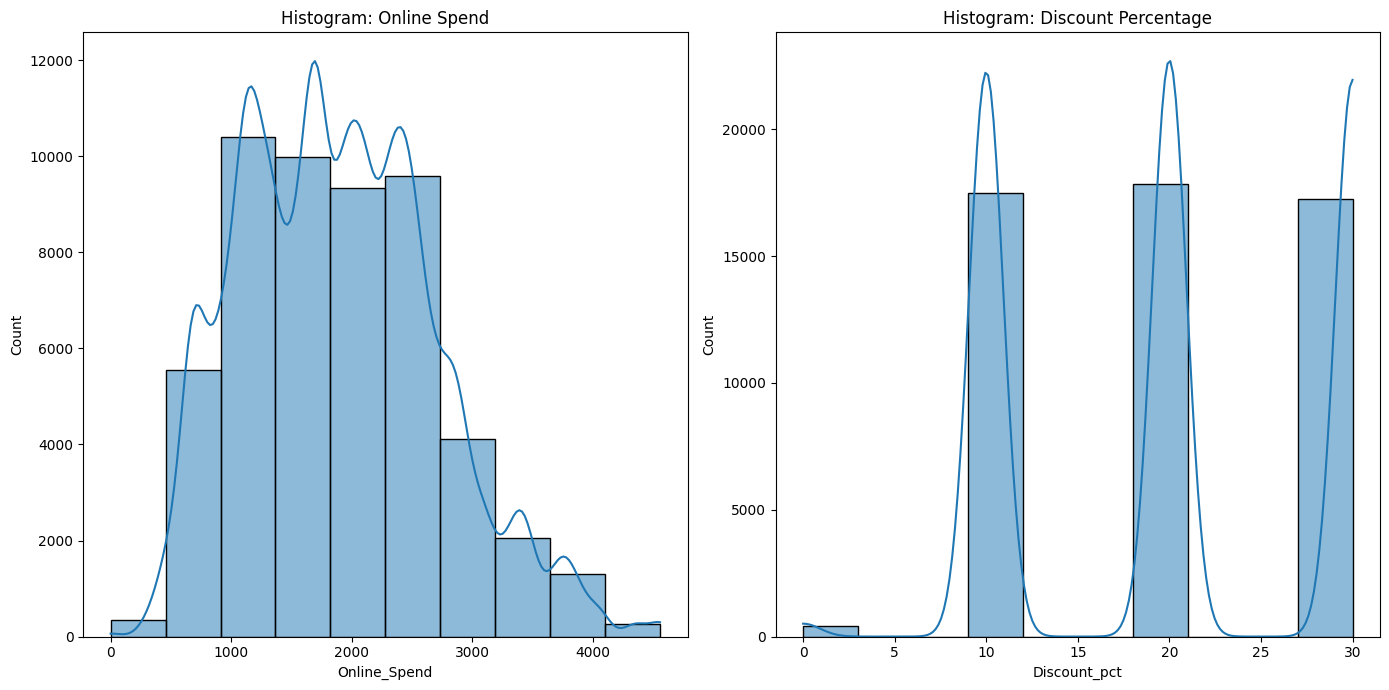

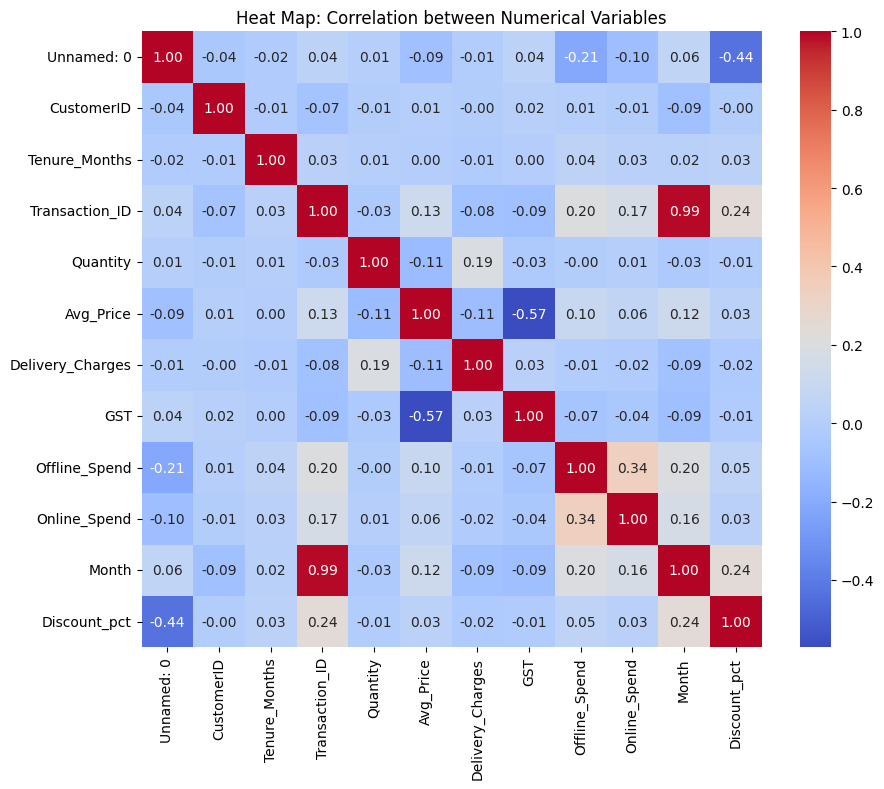

In [9]:
# q10
#1. Scatter Plot: Offline Spend vs Online Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Offline_Spend', y='Online_Spend', data=data)
plt.title('Scatter Plot: Offline Spend vs Online Spend')
plt.xlabel('Offline Spend')
plt.ylabel('Online Spend')
plt.show()

# 2. Box Plot: Online Spend, Offline Spend, Delivery Charges
plt.figure(figsize=(14, 7))
sns.boxplot(data=data[['Online_Spend', 'Offline_Spend', 'Delivery_Charges']])
plt.title('Box Plot: Online Spend, Offline Spend, Delivery Charges')
plt.show()

# 3. Histogram: Online Spend and Discount Percentage
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(data['Online_Spend'], bins=10, kde=True)
plt.title('Histogram: Online Spend')

plt.subplot(1, 2, 2)
sns.histplot(data['Discount_pct'], bins=10, kde=True)
plt.title('Histogram: Discount Percentage')

plt.tight_layout()
plt.show()

# 4. Heat Map: Correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map: Correlation between Numerical Variables')
plt.show()


In [10]:

# q11 Drop missing values for the relevant columns
data_clean = data.dropna(subset=['Offline_Spend', 'Online_Spend'])

# Pearson Correlation Test
pearson_corr, pearson_p = pearsonr(data_clean['Offline_Spend'], data_clean['Online_Spend'])
print(f"Pearson Correlation Coefficient: {pearson_corr:.4f}")
print(f"Pearson p-value: {pearson_p:.4f}")
if pearson_p < 0.05:
    print("Reject H0: There is a significant linear correlation between Offline Spend and Online Spend.")
else:
    print("Fail to reject H0: No significant linear correlation between Offline Spend and Online Spend.")

# Spearman Correlation Test
spearman_corr, spearman_p = spearmanr(data_clean['Offline_Spend'], data_clean['Online_Spend'])
print(f"\nSpearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p:.4f}")
if spearman_p < 0.05:
    print("Reject H0: There is a significant monotonic relationship between Offline Spend and Online Spend.")
else:
    print("Fail to reject H0: No significant monotonic relationship between Offline Spend and Online Spend.")


Pearson Correlation Coefficient: 0.3393
Pearson p-value: 0.0000
Reject H0: There is a significant linear correlation between Offline Spend and Online Spend.

Spearman Correlation Coefficient: 0.3009
Spearman p-value: 0.0000
Reject H0: There is a significant monotonic relationship between Offline Spend and Online Spend.


In [11]:

# q11 Create a contingency table for Gender and Coupon_Status
contingency_table = pd.crosstab(data['Gender'], data['Coupon_Status'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
if p < 0.05:
    print("Reject H0: There is a significant association between Gender and Coupon Status.")
else:
    print("Fail to reject H0: No significant association between Gender and Coupon Status.")



Chi-Square Statistic: 52955.2422
p-value: 0.0000
Reject H0: There is a significant association between Gender and Coupon Status.


In [12]:
# q12 Extract the dependent variable (Online Spend)
online_spend = data['Online_Spend'].dropna()

# 1. Check for normality using Shapiro-Wilk Test
r, p = shapiro(online_spend)
print('Shapiro-Wilk Test: r=%.2f, p=%.30f' % (r, p))

if p > 0.05:
    print("The data is normally distributed.")
else:
    print(" The data is NOT normally distributed.")

# 2. One-Sample T-test: Is the average Online_Spend equal to 300?
t_stat, p_value = ttest_1samp(online_spend, 300)
print(f"\nOne-Sample T-Test: t=%.4f, p=%.4f" % (t_stat, p_value))

if p_value < 0.05:
    print(" Reject H0: The sample mean is significantly different from 300.")
else:
    print("Fail to reject H0: The sample mean is not significantly different from 300.")

Shapiro-Wilk Test: r=0.98, p=0.000000000000000000000000000000
 The data is NOT normally distributed.

One-Sample T-Test: t=453.3613, p=0.0000
 Reject H0: The sample mean is significantly different from 300.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 52955.
  res = hypotest_fun_out(*samples, **kwds)


[[10.]
 [10.]
 [10.]
 ...
 [10.]
 [20.]
 [30.]]
[2424.5 2424.5 2424.5 ...    0.     0.     0. ]
X_train [[30.]
 [20.]
 [30.]
 ...
 [10.]
 [30.]
 [30.]]
X_test [[30.]
 [30.]
 [30.]
 ...
 [30.]
 [30.]
 [10.]]
y_train [[30.]
 [30.]
 [30.]
 ...
 [30.]
 [30.]
 [10.]]
y_test [3100.42 1079.34 2365.81 ... 1066.12 1736.19 2056.17]
pred online_spendig: [1921.61069445 1921.61069445 1921.61069445 ... 1921.61069445 1921.61069445
 1865.09012919]
real online_spendig:: [3100.42 1079.34 2365.81 ... 1066.12 1736.19 2056.17]
Intercept, b0: 1836.8298465568507
coffecient, b1: [2.82602826]
[1865.09012919] [1879.22027051] [1907.48055314]


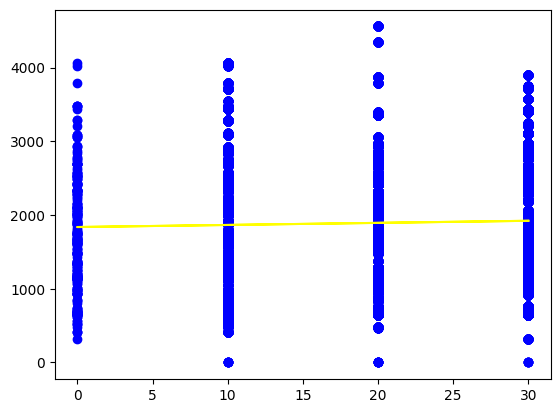

In [13]:
# q13 get the dependent (y: Online_Spend) and independent (x: Discount_pct) variables
X = data.iloc[:, [20]].values # Discount_pct
print(X)
y = data.iloc[:, 17].values # Online_Spend
print(y)

#split the training set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=1/3)
print("X_train",X_train)
print("X_test",X_test)
print("y_train",X_test)
print("y_test",y_test)

#fitting (training) the linear regressor
regressor= LinearRegression()
regressor.fit(X_train,y_train)

# Make predigtions using the regressor
y_pred = regressor.predict(X_test)
print ('pred online_spendig:',y_pred)
print ('real online_spendig::',y_test)

# Predict for 10% discount
regressor.predict([[10]])

# PLOT THE OBTAINED REGRESSOR
plt.scatter(X_train , y_train , color='blue')
plt.plot (X_train , regressor.predict(X_train), color ='yellow')

#get the model parameters intercpts ad coffcients
print('Intercept, b0:', regressor.intercept_)
print('coffecient, b1:', regressor.coef_)

# make a prediction using the regressor for a set of Discount_pct values
spend1 = regressor.predict([[10]])
spend2 = regressor.predict([[15]])
spend3 = regressor.predict([[25]])
print(spend1, spend2, spend3)


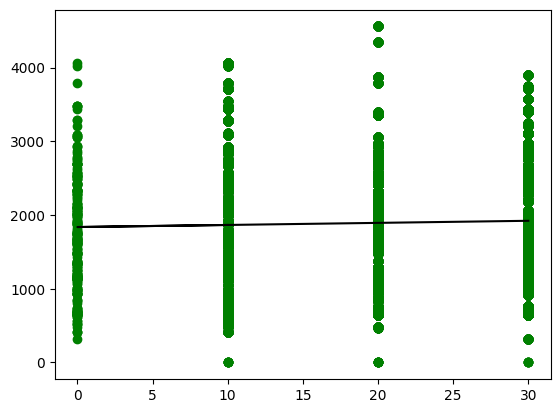

In [14]:
# q13PLOT THE OBTAINED REGRESSOR ON the traning set
plt.scatter(X_train , y_train , color='green')
plt.plot (X_test , regressor.predict(X_test), color ='black')


In [15]:
print(data.columns.tolist())


['Unnamed: 0', 'CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID', 'Transaction_Date', 'Product_SKU', 'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend', 'Month', 'Coupon_Code', 'Discount_pct']


       Tenure_Months  Quantity  Avg_Price  Delivery_Charges  Offline_Spend  \
0               12.0       1.0     153.71               6.5         4500.0   
1               12.0       1.0     153.71               6.5         4500.0   
2               12.0       2.0     122.77               6.5         4500.0   
3               12.0       1.0      81.50               6.5         4500.0   
4               12.0       1.0     153.71               6.5         4500.0   
...              ...       ...        ...               ...            ...   
52950            0.0       0.0       0.00               0.0            0.0   
52951            0.0       0.0       0.00               0.0            0.0   
52952            0.0       0.0       0.00               0.0            0.0   
52953            0.0       0.0       0.00               0.0            0.0   
52954            0.0       0.0       0.00               0.0            0.0   

       Discount_pct  
0              10.0  
1              10.0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


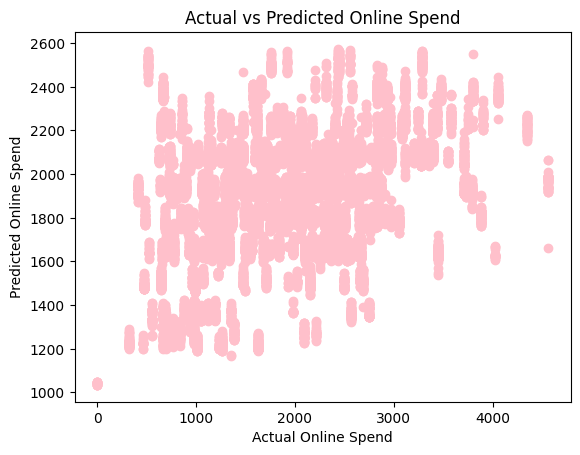

Intercept, b0: 1027.4356209442512
coffecient, b1: [ 0.93062651  0.65038441  0.36683186 -0.70066297  0.28609843  0.70701126]
[2424.92950978] [2421.42619492] [2414.41956522]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
# get the dependent (y: Online_Spend) and independent (x: Tenure_Months, Quantity, Avg_Price, Delivery_Charges, Discount_pct, Offline_Spend, GST) variables
X = data.iloc[:, [4,10, 11, 12, 16,20]]
print(X)
y = data.iloc[:, 17].values # Online_Spend
print(y)

# Create and fit the linear regression model
model = LinearRegression ()
model.fit(X,y)

# Make predictions
predictions = model.predict(X)

#split the training set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=1/3)
print("X_train",X_train)
print("X_test",X_test)
print("y_train",X_test)
print("y_test",y_test)

#fitting (training) the linear regressor
regressor= LinearRegression()
regressor.fit(X_train,y_train)

# Make predigtions using the regressor
y_pred = regressor.predict(X_test)
print ('pred online_spendig:',y_pred)
print ('real online_spendig::',y_test)

# Predict for 10% discount
regressor.predict([[12.0, 153.71, 6.5, 10.0, 4500.0, 5.0]])

# PLOT THE OBTAINED REGRESSOR
plt.scatter(y_test, y_pred, color='pink')
plt.xlabel("Actual Online Spend")
plt.ylabel("Predicted Online Spend")
plt.title("Actual vs Predicted Online Spend")
plt.show()

#get the model parameters intercpts ad coffcients
print('Intercept, b0:', regressor.intercept_)
print('coffecient, b1:', regressor.coef_)

# Predict Online_Spend for different discount percentages
spend1 = regressor.predict([[12.0, 153.71, 6.5, 10.0, 4500.0, 5.0]])
spend2 = regressor.predict([[12.0, 153.71, 6.5, 15.0, 4500.0, 5.0]])
spend3 = regressor.predict([[12.0, 153.71, 6.5, 25.0, 4500.0, 5.0]])

print(spend1, spend2, spend3)

In [17]:
#q15(Naïve-Bayes )
# Get the dependent variable and the independent variables
X = data.iloc[:, :1].values
y = data.iloc[:,  1].values

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the Naive Bayes model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predict on the X_test
y_pred = clf.predict(X_test)

# Get the confusion matrix and the accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)

print("confusion matrix:\n", cm)
print("accuracy:", ac)
print("recall:", rc)
print("precision:", pr)


confusion matrix:
 [[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy: 0.03276366726465867
recall: [1. 0. 0. ... 0. 0. 0.]
precision: [0.75 0.   0.   ... 0.   0.   0.  ]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
#q15(Decision Tree)
# Get the dependent variable and the independent variables
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the X_test
y_pred = clf.predict(X_test)

# Get the confusion matrix and the accuracy score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average=None)
pr = precision_score(y_test, y_pred, average=None)

print("confusion matrix:\n", cm)
print("accuracy:", ac)
print("recall:", rc)
print("precision:", pr)


confusion matrix:
 [[ 5  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0 22]]
accuracy: 0.7313756963459541
recall: [1.         0.         0.53846154 ... 0.5        0.         0.84615385]
precision: [1.         0.         0.77777778 ... 1.         0.         0.88      ]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
# (KNN)Extract the dependent and the independent variables
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the KNN model
clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
clf.fit(X_train, y_train)

# Make the predictions on the test set X_test
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model and display its confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy=:", accuracy)


[[ 7  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0 16]]
Accuracy=: 0.6807666886979511


In [20]:
# (Logistic Regression)Extract the dependent and independent variables


# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting the Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make the predictions on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy of the model and display its confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy=:", accuracy)

confusion matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy=: 0.021999811160419224


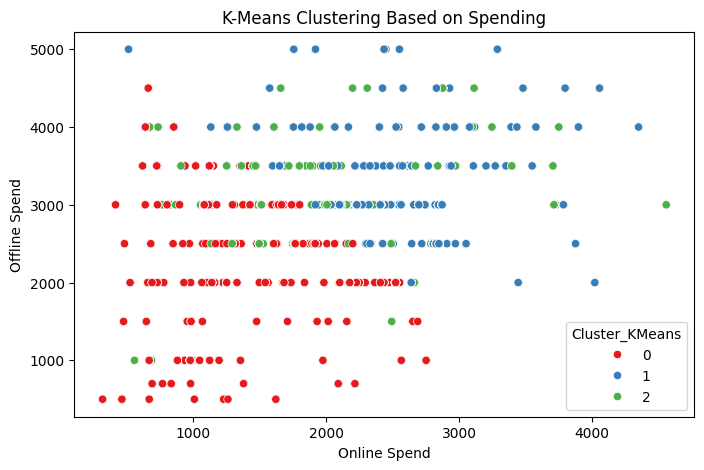

In [ ]:
#Q18
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the dataset
data = pd.read_csv("file.csv")  # Ensure the file is in the same directory

# Select relevant fields and drop rows with missing values
X = data[['Online_Spend', 'Offline_Spend', 'Quantity', 'Avg_Price']].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Visualize K-means clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Online_Spend'], y=X['Offline_Spend'], hue=X['Cluster_KMeans'], palette='Set1')
plt.title('K-Means Clustering Based on Spending')
plt.xlabel('Online Spend')
plt.ylabel('Offline Spend')
plt.show()

# Perform Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering (Dendrogram)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()